In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [193]:
df = pd.read_csv('input/cardio_train.csv', sep=';')

### 1.1 Read Data

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [195]:
# see statistic of data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


Continuous data: age, height, weight, ap_hi, ap_lo\
Binary data: gender, cholesterol, gluc, smoke, alco, active, cardio

In [196]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

### 1.2 Check for duplicates and convert excel date to calculated date

In [197]:
# check for duplicates
df.duplicated().sum()

0

In [198]:
# change excel date to calender year and find the calculated age
from datetime import datetime

age_df = df['age']
current_year = datetime.today().year
df['age_calculated'] = 'Unknown' 

for row in range(len(age_df)):
    excel_date = age_df.iloc[row]
    dt = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + excel_date - 2 )
    tt = dt.timetuple()
    birth_year = tt.tm_year
    age = current_year - birth_year
#     print('current:',current_year, 'birth:', birth_year, 'age:',age, row)
    df['age_calculated'].iloc[row] = age
    


<ipython-input-198-f142fe3efc56>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_calculated'].iloc[row] = age


In [199]:
# check is age_calculated is correct
df.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_calculated
57994,82762,16845,1,164,65.0,170,80,2,1,0,0,1,1,76
62946,89897,20238,1,155,73.0,140,100,1,1,0,0,0,0,67
59222,84563,14398,2,172,80.0,120,80,1,1,0,1,1,0,83
12003,17132,19772,2,176,100.0,120,90,1,2,0,0,1,0,68
5981,8496,22746,1,168,68.0,140,90,1,1,0,0,0,1,60


In [200]:
# replace age column with age_calculated column
# drop age_calculated column
df['age'] = df['age_calculated'].astype(int)
df.drop(columns=['age_calculated','id'], axis=1, inplace=True) 

In [201]:
# finalised cleaned data
df.sample()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
16913,72,1,169,79.0,110,80,1,2,0,0,1,0


### 1.2.1 Combine height and weight to BMI

In [202]:
# create a BMI column
df['BMI'] = round(df['weight'] / (df['height'] / 100)**2,3)

# drop height and weight
df.drop(columns=['height', 'weight'], axis=1, inplace=True)

In [203]:
df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,72,2,110,80,1,1,0,0,1,0,21.967
1,67,1,140,90,3,1,0,0,1,1,34.928
2,71,1,130,70,3,1,0,0,0,1,23.508
3,74,2,150,100,1,1,0,0,1,1,28.710
4,75,1,100,60,1,1,0,0,0,0,23.011
...,...,...,...,...,...,...,...,...,...,...,...
69995,70,2,120,80,1,1,1,0,1,0,26.927
69996,61,1,140,90,2,2,0,0,1,1,50.473
69997,70,2,180,90,3,1,0,1,0,1,31.354
69998,61,1,135,80,1,2,0,0,0,1,27.099


### 1.3 Skewness

In [204]:
# check skeweness of dat
df.skew().sort_values(ascending=False) # positive is right skewed, negative is left skewed

#If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#If the skewness is less than -1 or greater than 1, the data are highly skewed

ap_hi          85.296214
ap_lo          32.114083
BMI             7.728386
alco            3.956607
smoke           2.905867
gluc            2.397462
cholesterol     1.587123
gender          0.630960
age             0.305437
cardio          0.001200
active         -1.529473
dtype: float64

### 1.4 Visualise continuousfeatures

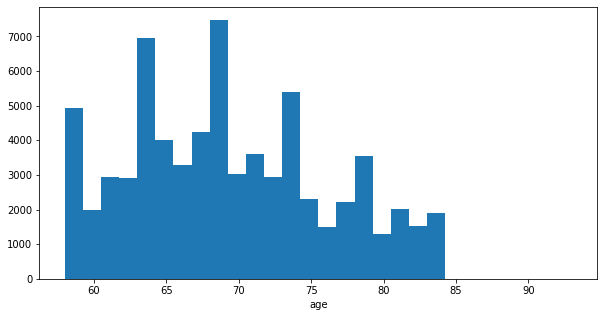

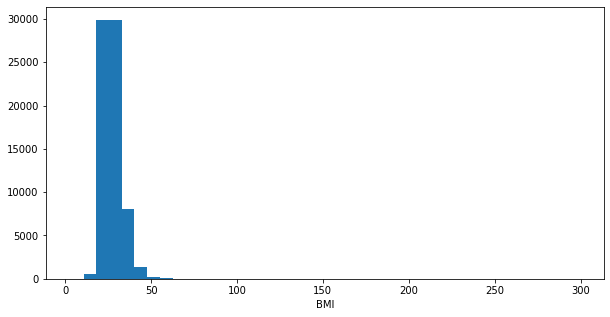

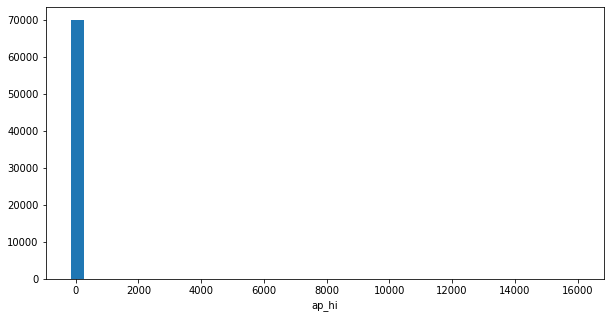

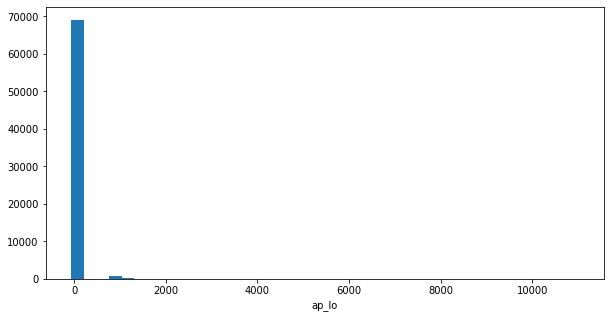

In [205]:
# generate a list of numerical variables
columns = ['age', 'BMI', 'ap_hi', 'ap_lo']

for col in columns:
    plt.subplots(figsize=(10, 5))
    nbins = min(df[col].value_counts().count(),40)
    plt.hist(data=df, x=col, bins=nbins)
    plt.xlabel(col)
    plt.show()

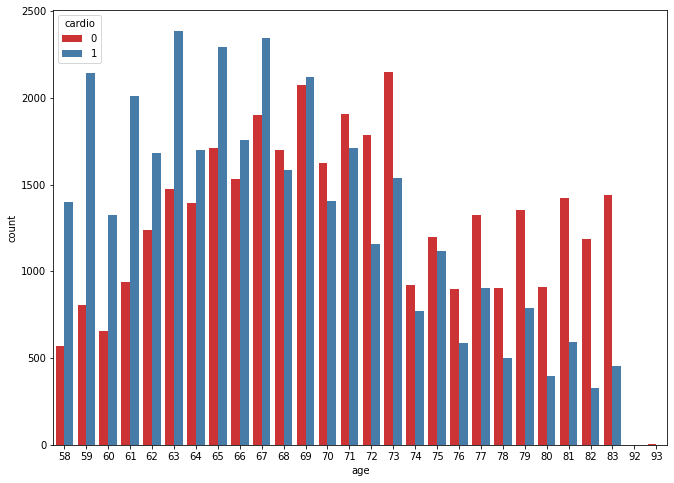

In [206]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = df, palette="Set1");

### 1.5 Correlations

<ipython-input-207-24d38d6f100f>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


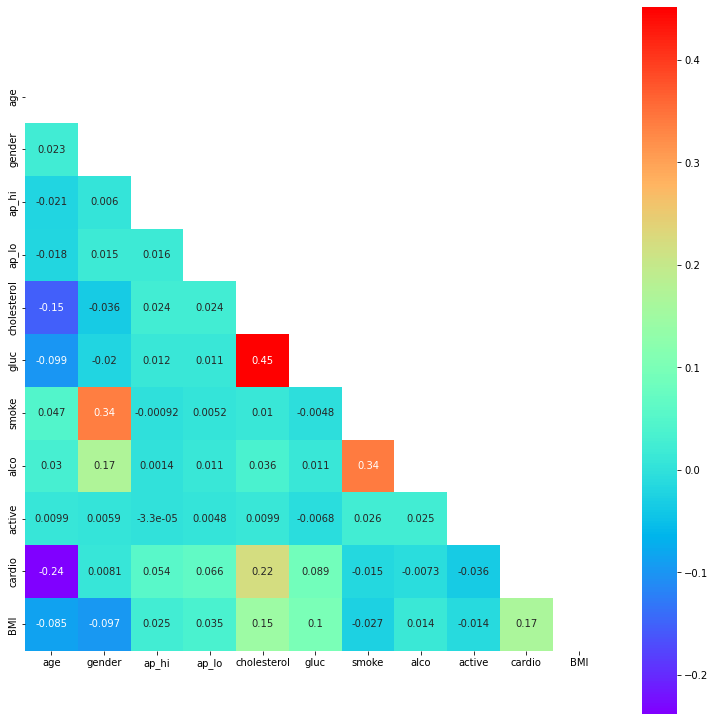

In [207]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(13,13))
sns.heatmap(corr, annot=True, square=True, cmap='rainbow', mask=mask)
plt.show()

ap_hi and ap_lo has a higher correlation 

### 1.6 Visualise categorial features¶

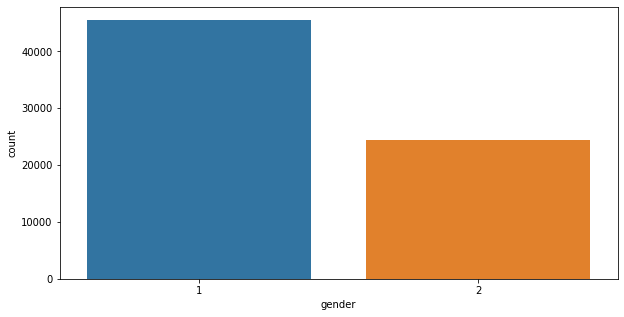

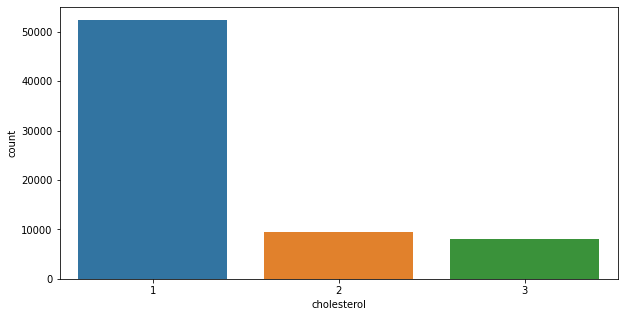

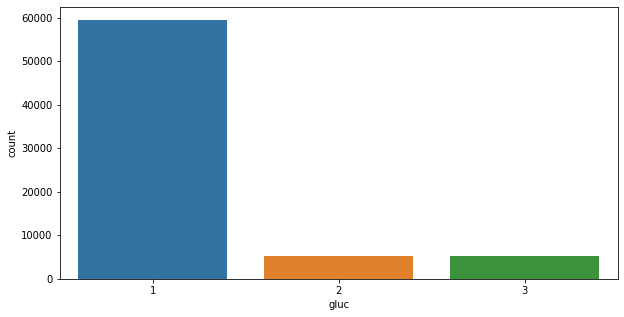

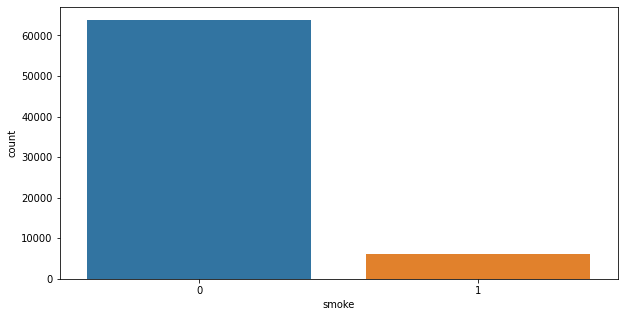

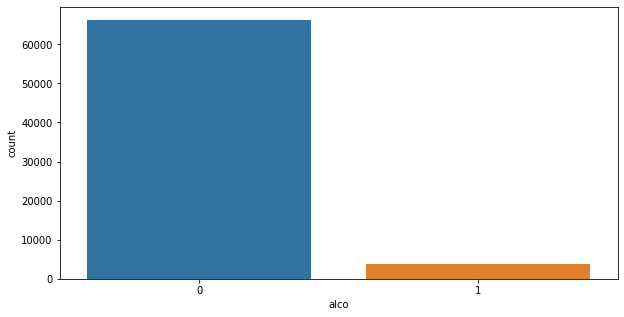

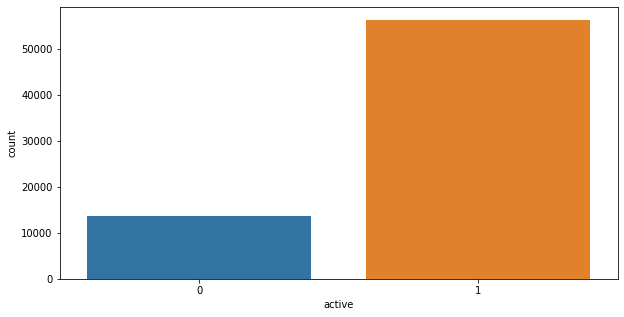

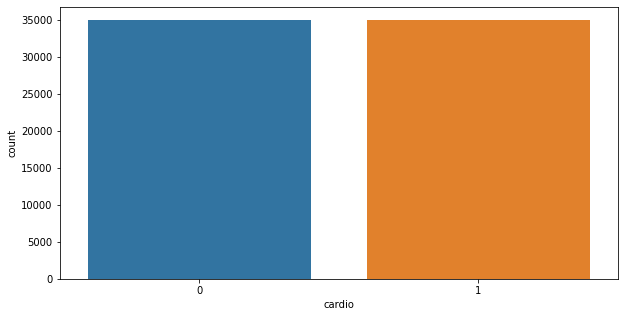

In [208]:
columns = [ 'gender','cholesterol', 'gluc','smoke', 'alco', 'active', 'cardio']

for col in columns:
    plt.subplots(figsize=(10,5))
    sns.countplot(x=col, data=df)
    plt.show()

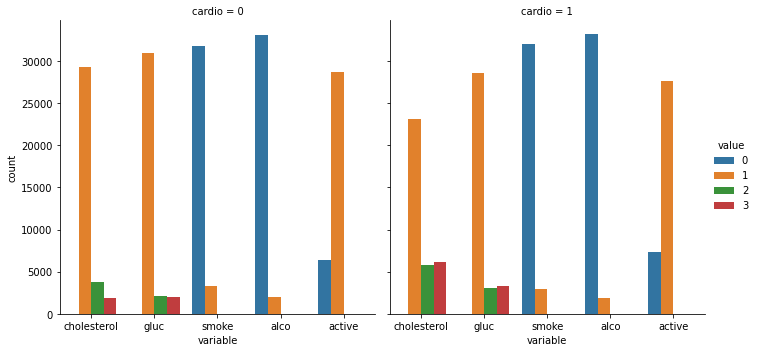

In [209]:
# Bivariate analysis¶

df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

### 1.7 Understand the data more

Identify if 1 or 2 is women

In [210]:
# dummy encode gender
dummy_gender = pd.get_dummies(df['gender'], drop_first=True)
df['gender'] = dummy_gender

### 1.8 Removing outliers 

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


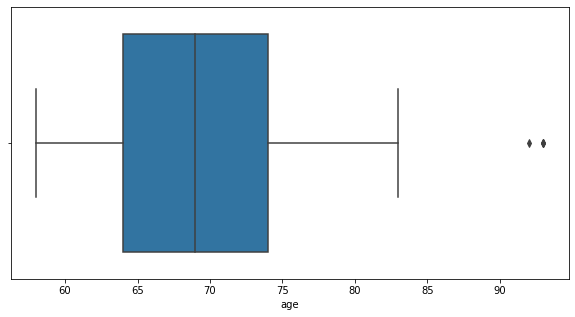

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


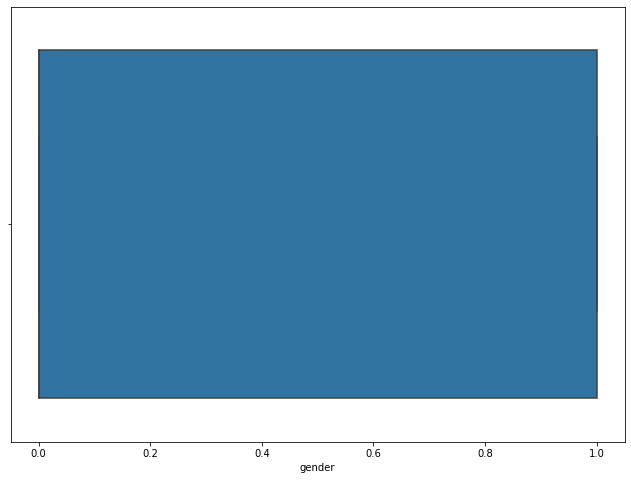

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


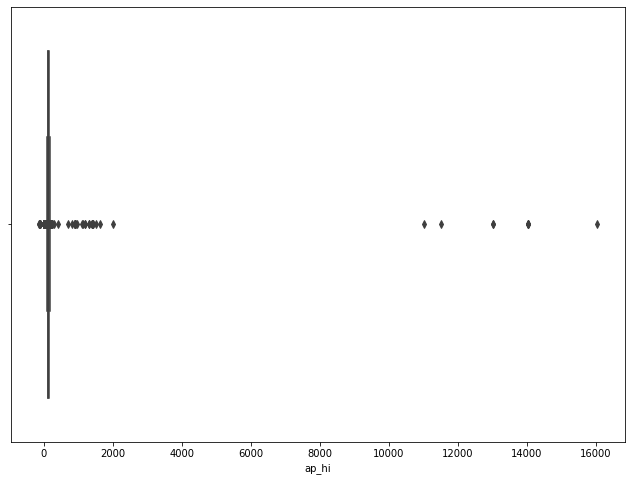

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


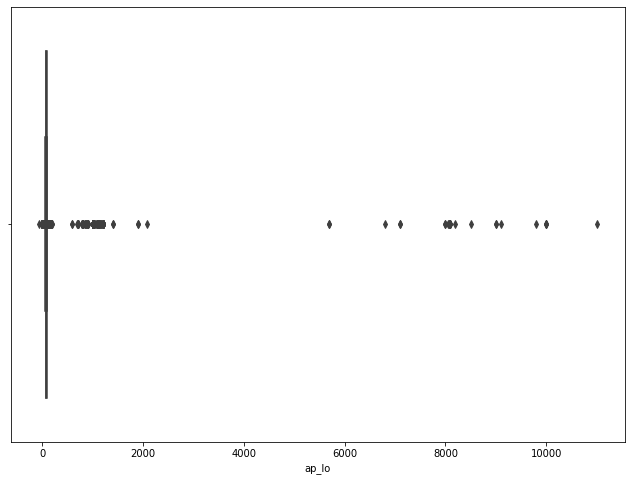

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


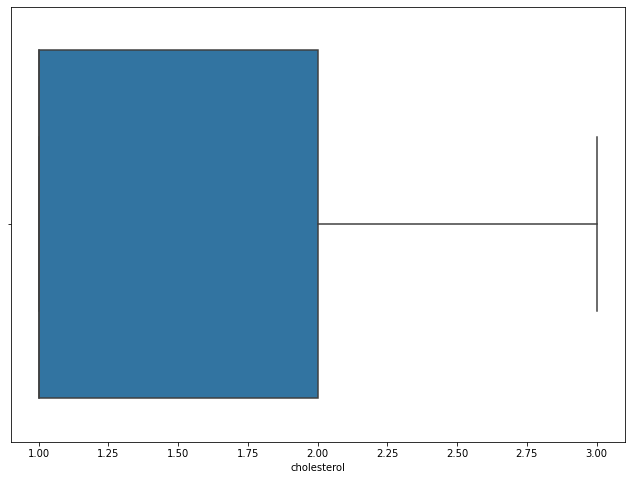

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


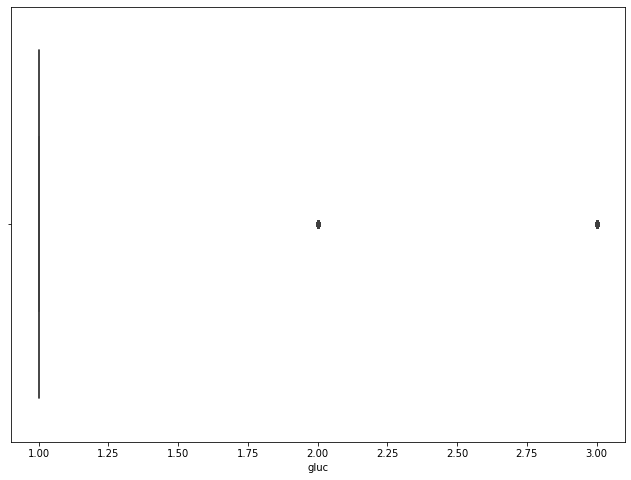

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


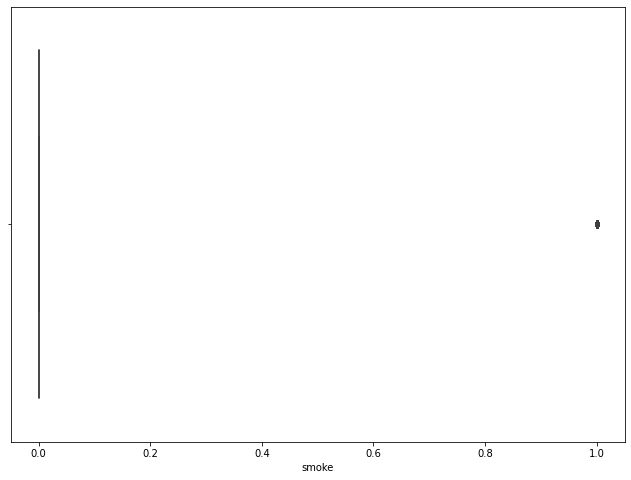

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


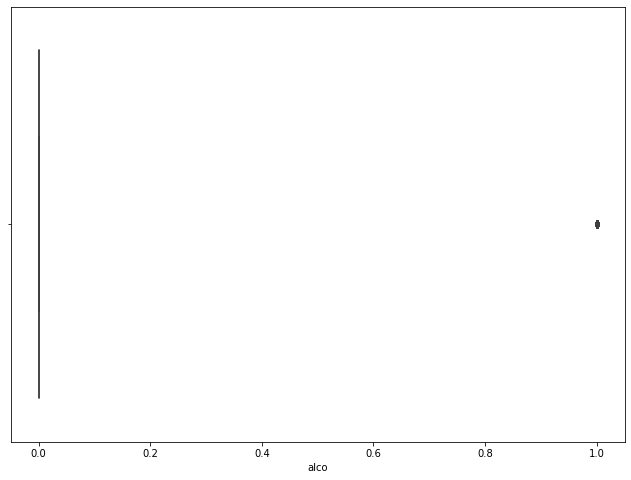

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


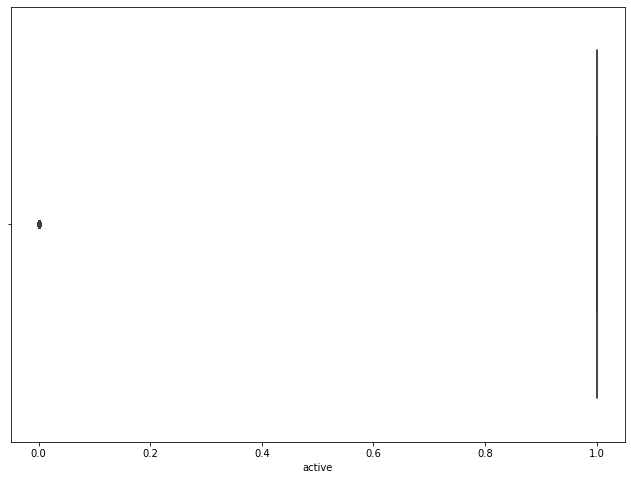

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


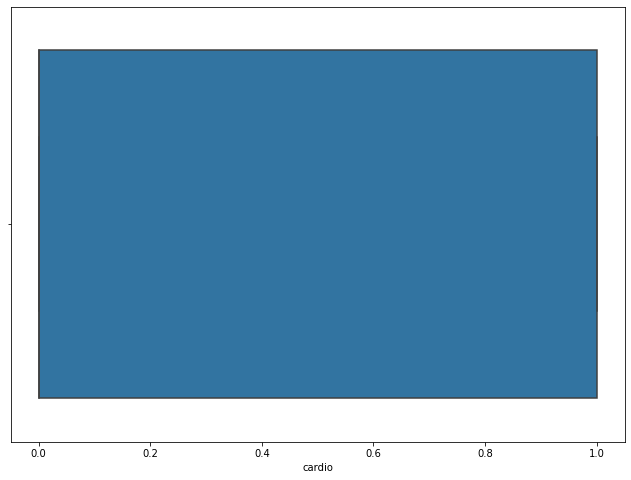

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


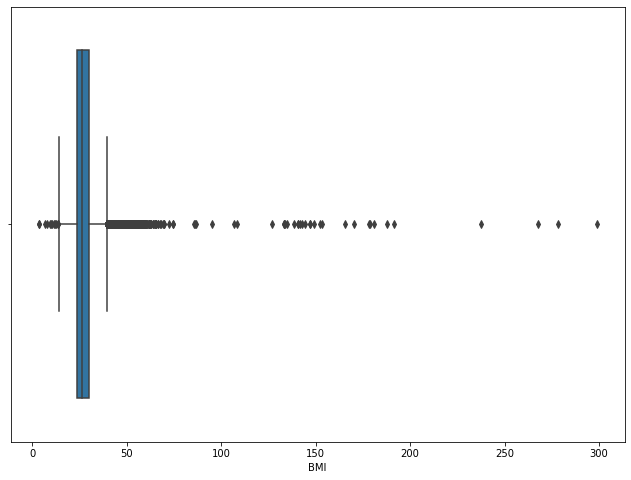

In [211]:
# check for outliers
fig = plt.figure(figsize=(10,5))

for column in df.columns:
    sns.boxplot(df[column])
    plt.show()
    

### Check domain knowledge for systolic & diatolic blood pressure
[![image](https://i.im.ge/2022/09/19/1sXIX8.image.png)](https://im.ge/i/1sXIX8)
#### ap_hi -> systolic
#### ap_lo -> diatolic

In [212]:
# function for finding 99.7% of data
def three_sd_range(series):
    three_sd = 3 * series.std()
    
    low = series.mean() - three_sd
    high = series.mean() + three_sd
    return (low, high)

In [213]:
# data with outliers
# age mean=69, max=93
# height mean=164, min=55, max= 250
# weight
# ap_hi & ap_lo remove -ve values and value higher than 200. High blood pressure 140 and above

# remove outliers
columns_ = ['age','BMI','ap_hi','ap_lo']
for column in columns_:
    low, high = three_sd_range(df[column])
    df = df[(df[column]>=low) & (df[column]<=high)] 
    

In [214]:
# check for ouliers and if they makes sense
df.describe()
# min and max values for ap_hi and ap_lo is still too low and high

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68493.000000,68493.000000,68493.000000,68493.000000,68493.000000,68493.000000,68493.000000,68493.000000,68493.000000,68493.000000,68493.000000
mean,69.214883,0.350123,126.226432,81.308148,1.362884,1.224329,0.088126,0.053582,0.803323,0.493715,27.299601
std,6.764115,0.477012,17.865789,10.246261,0.677557,0.570142,0.283480,0.225193,0.397489,0.499964,4.888624
min,58.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.331000
25%,64.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875000
50%,69.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298000
75%,74.000000,1.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.095000
max,83.000000,1.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,45.820000


### External source for range of possible systolic and diatolic range
[![image](https://i.im.ge/2022/09/19/1sXzv6.image.png)](https://im.ge/i/1sXzv6)
#### set range for 70<=ap_hi<=190 & 40<=ap_lo<100

In [215]:
df = df[(df['ap_hi']>=70) & (df['ap_hi']<=190)] 
df = df[(df['ap_lo']>=40) & (df['ap_lo']<=100)] 

In [216]:
# check min and max for ap_hi and ap_lo
df.agg({'ap_hi':['min','max'], 'ap_lo':['min','max']}).T

,min,max
ap_hi,70,190
ap_lo,40,100


In [217]:
# length of df and % data kept
print('Length of df:{}\nPercentage data kept:{}%'.format(len(df),round(len(df)/70000*100,2)))

Length of df:67457
Percentage data kept:96.37%


C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


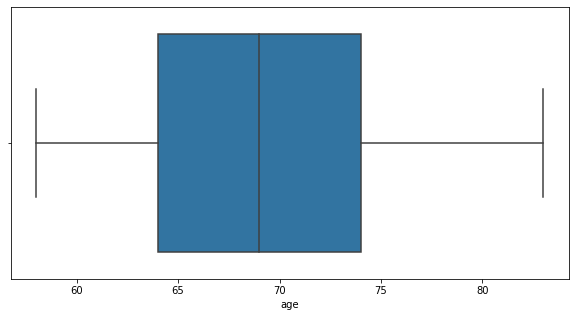

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


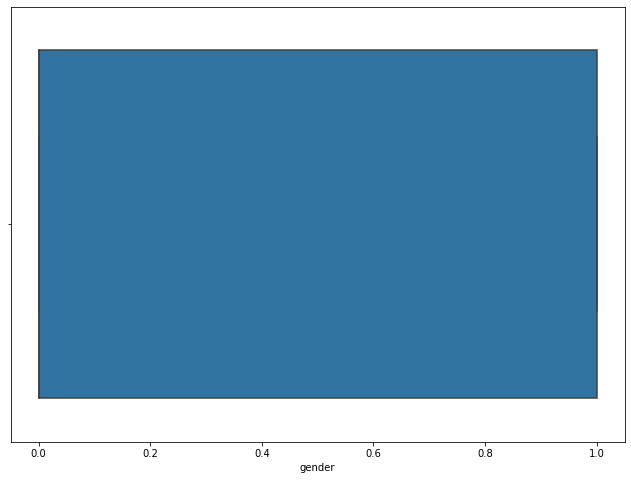

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


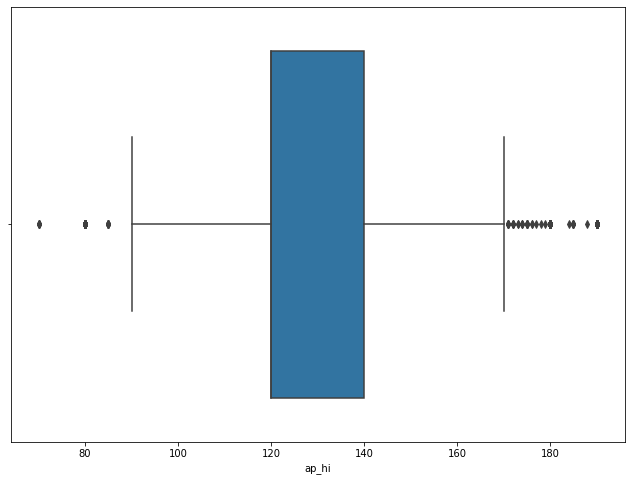

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


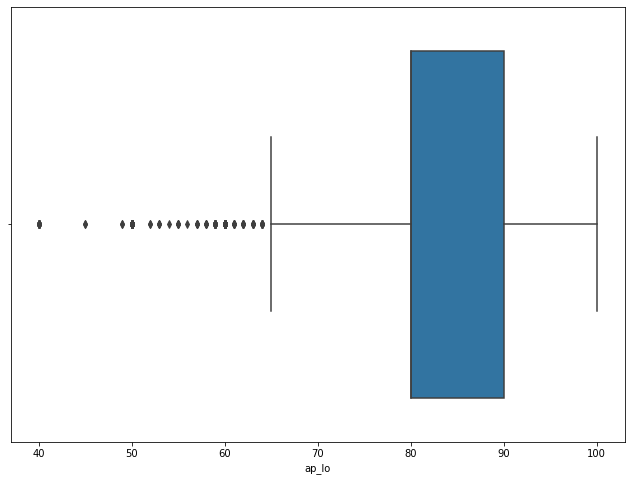

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


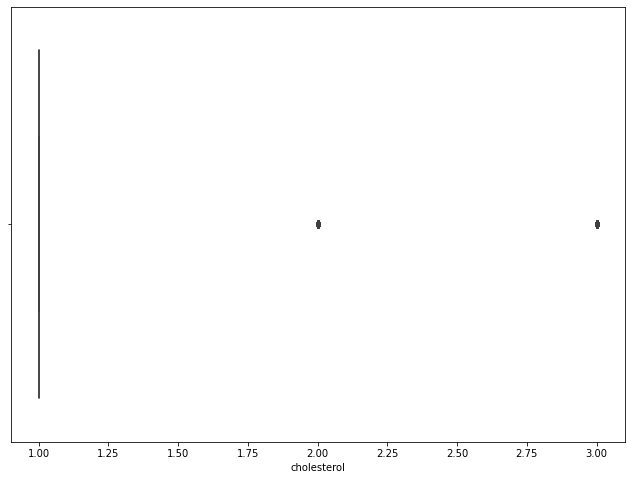

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


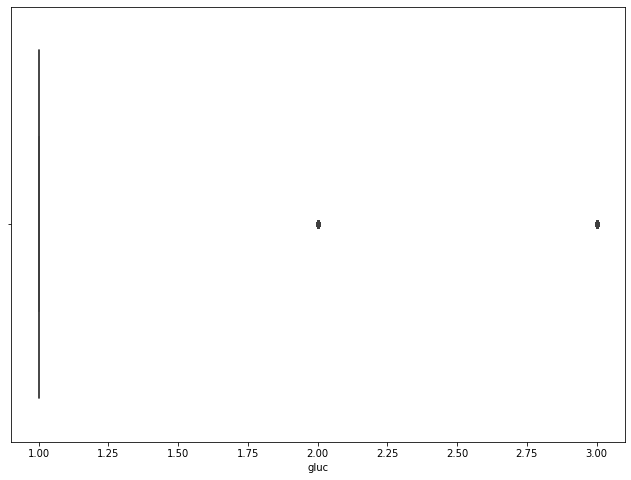

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


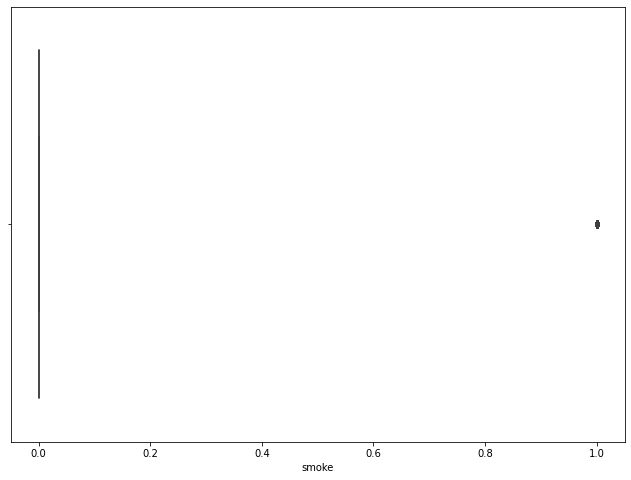

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


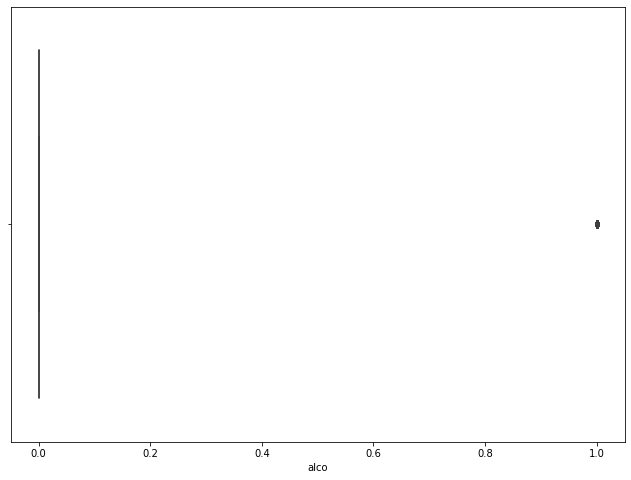

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


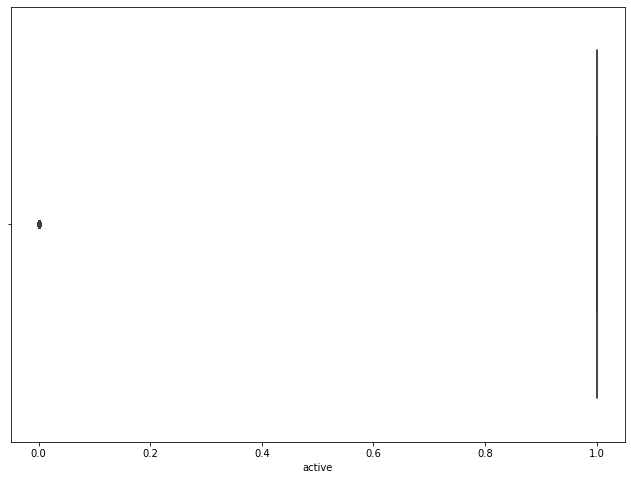

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


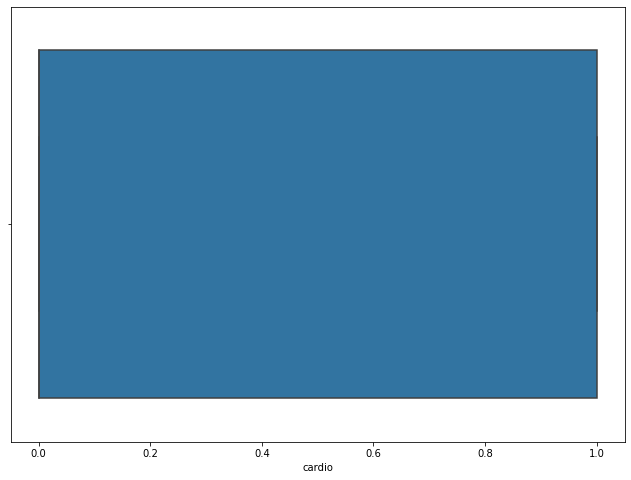

C:\Users\yvonn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


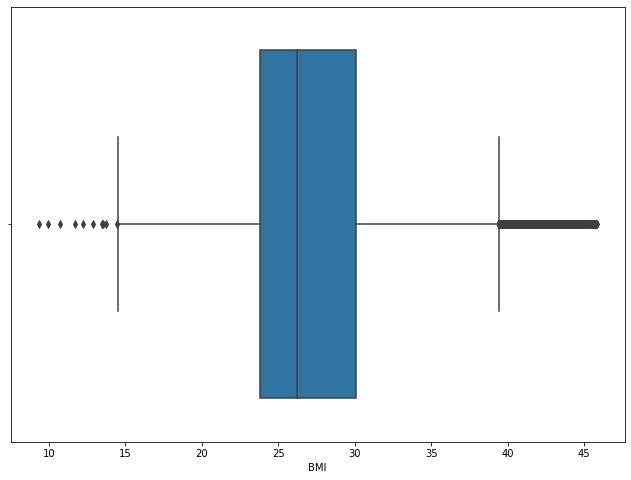

In [218]:
# check for outliers
fig = plt.figure(figsize=(10,5))

for column in df.columns:
    sns.boxplot(df[column])
    plt.show()
    

In [219]:
df.skew().sort_values(ascending=False)

alco           3.994670
smoke          2.913664
gluc           2.427047
cholesterol    1.617333
BMI            0.848249
ap_hi          0.722581
gender         0.633494
age            0.300909
cardio         0.040717
ap_lo         -0.075245
active        -1.526151
dtype: float64

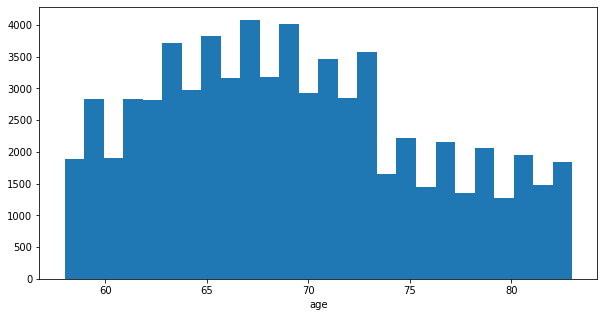

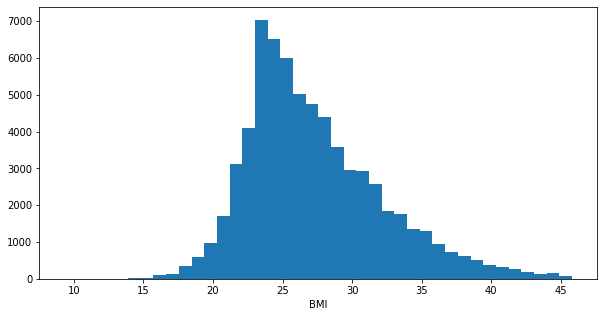

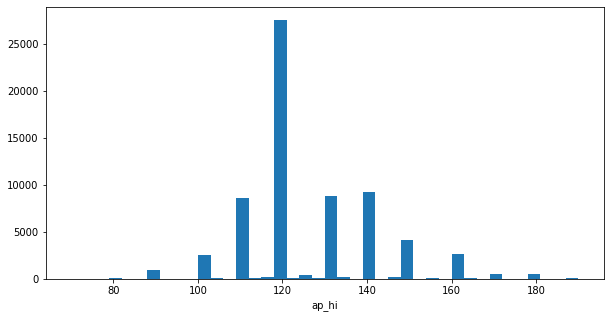

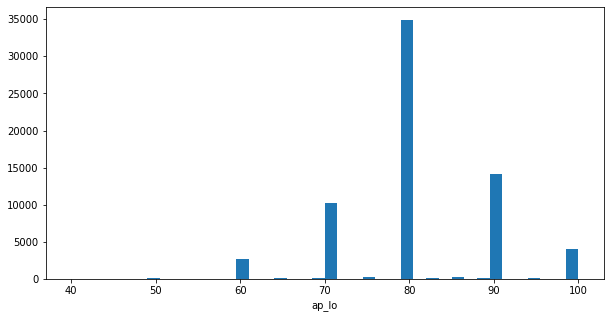

In [220]:
columns = ['age', 'BMI', 'ap_hi', 'ap_lo']

for col in columns:
    plt.subplots(figsize=(10, 5))
    nbins = min(df[col].value_counts().count(),40)
    plt.hist(data=df, x=col, bins=nbins)
    plt.xlabel(col)
    plt.show()

In [221]:
#### Non-scaled data for decision tree, random forest, naive bayes
#### Scale for KNN, NN, Logistic Regression, SVM
df.to_csv('cardio_train_cleaned.csv' ,index=False)